In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:

from google.colab import files
uploaded = files.upload()

Saving train_airplanes.csv to train_airplanes.csv


In [7]:
df_test = pd.read_csv("test_airplanes.csv")
df_train = pd.read_csv("train_airplanes.csv")


,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,target
0,0,0,-0.492317,1.466367,-1.526395,-1.096350,1.535413,0.431657,-0.995667,-0.923376,...,0.297878,-0.284032,1.687770,-0.921498,1.125147,-1.374343,-1.134642,0.455824,-0.840537,1
1,1,1,-0.008567,1.139580,0.790067,-0.228271,1.113299,-1.636661,-2.196571,0.242685,...,-1.990695,1.846958,-0.568885,0.989542,1.480607,1.359533,-0.868660,-1.588205,-0.644534,0
2,2,2,0.262494,-1.708783,0.839842,-0.687014,-1.073257,-0.969666,-0.193912,-0.176669,...,-2.166032,2.418959,1.634712,-0.602909,0.883138,-0.286632,-0.075973,0.234760,0.082982,1
3,3,3,-1.804729,-0.241023,-0.661755,0.818932,-0.603637,0.002671,1.321453,-0.192295,...,0.424665,-0.605261,-1.361730,0.578875,0.714414,0.152165,2.286288,-0.285059,0.638533,1
4,4,4,-0.017279,0.813156,-1.020284,0.874544,-0.572061,0.497832,0.012510,-0.743429,...,2.769164,-3.464306,-0.087558,-0.654737,2.019519,-2.293658,-1.574068,1.344927,-2.390142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,795,0.480216,-0.815049,-0.727074,0.511742,-0.507355,1.029718,0.429738,0.146823,...,0.961482,-0.795995,0.063269,-0.618536,0.586455,-0.047379,0.299899,0.725734,-0.649755,0
796,796,796,0.857515,2.327731,-1.185683,-0.586519,-0.558847,0.712851,0.261446,-1.064356,...,0.749485,-0.710907,-0.537000,0.894755,-0.981916,-0.062048,0.609614,0.206624,-1.724080,1
797,797,797,0.023109,0.342980,-1.008733,-0.841854,-0.168426,0.486804,-1.697874,-0.780809,...,-1.049205,1.553320,-1.185487,-0.677708,0.329874,0.889464,-0.528109,0.443686,0.380687,1
798,798,798,0.081947,-0.562397,-0.127637,-0.105462,0.535161,-0.426872,2.288164,-0.962513,...,-1.758119,2.087053,1.204362,-1.382999,-0.329993,0.443899,2.517259,0.799944,-0.439192,1


In [8]:
df_test


,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,0,800,1.432238,1.257644,1.890934,-0.076106,-0.203592,-1.030505,-0.507463,-0.913854,...,-1.520607,-0.456102,0.215358,-1.112354,0.253735,-1.096198,0.729349,-0.271966,-1.197476,-0.366255
1,1,801,-0.487362,-0.529995,-2.155134,-0.304178,0.592418,2.116620,-1.257519,-0.068750,...,-1.217697,3.722498,-3.980885,-0.650480,1.587658,-1.218420,-0.091350,1.049596,-0.329357,-1.257669
2,2,802,0.962898,-0.504579,-2.691505,0.360136,-0.140119,1.901269,-1.848652,0.011345,...,-1.038533,0.656443,-0.096040,0.475109,0.808705,-0.809677,0.088951,-1.145836,-0.370616,-0.481098
3,3,803,-1.065925,0.873071,-1.037717,0.662265,0.802348,0.726761,0.453310,-1.594920,...,-0.033588,-0.430315,0.858692,0.399967,-0.095303,-1.550865,-0.241926,0.676382,1.070216,0.645921
4,4,804,0.728761,-1.386261,-2.024987,-0.384726,-0.513772,1.314300,-0.220896,-1.090314,...,-1.170150,-0.058732,0.595794,-0.524804,-0.372592,-1.115247,0.472592,-0.472584,-1.116276,0.095643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,995,0.846628,-0.749934,-1.338411,0.220909,0.416199,1.276989,-1.002624,1.014313,...,-1.269906,0.084734,0.438042,0.558635,0.376235,-0.420479,1.077255,0.308251,-0.004729,-0.228137
196,196,996,-1.360590,-0.435774,-0.959673,1.448202,1.623034,1.250623,-0.590804,-0.366393,...,-1.316549,1.347188,-1.208343,-0.264682,1.953662,0.097516,1.251864,1.437369,1.422854,-0.830343
197,197,997,0.165061,0.136864,1.754852,-1.034737,0.656459,-2.282070,0.293433,-0.115058,...,0.758951,-2.311418,2.012022,0.193781,-0.573808,-0.233587,0.232461,-1.188404,-1.117578,0.475218
198,198,998,0.063662,-0.131181,-3.447062,0.437513,-0.749994,3.151641,-1.548259,0.354168,...,0.323803,2.119067,-1.441525,1.142955,2.426559,2.700225,0.238825,-0.512474,-1.756672,-1.366628


In [9]:

df_train

,Unnamed: 0,index,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,target
0,0,0,-0.492317,1.466367,-1.526395,-1.096350,1.535413,0.431657,-0.995667,-0.923376,...,0.297878,-0.284032,1.687770,-0.921498,1.125147,-1.374343,-1.134642,0.455824,-0.840537,1
1,1,1,-0.008567,1.139580,0.790067,-0.228271,1.113299,-1.636661,-2.196571,0.242685,...,-1.990695,1.846958,-0.568885,0.989542,1.480607,1.359533,-0.868660,-1.588205,-0.644534,0
2,2,2,0.262494,-1.708783,0.839842,-0.687014,-1.073257,-0.969666,-0.193912,-0.176669,...,-2.166032,2.418959,1.634712,-0.602909,0.883138,-0.286632,-0.075973,0.234760,0.082982,1
3,3,3,-1.804729,-0.241023,-0.661755,0.818932,-0.603637,0.002671,1.321453,-0.192295,...,0.424665,-0.605261,-1.361730,0.578875,0.714414,0.152165,2.286288,-0.285059,0.638533,1
4,4,4,-0.017279,0.813156,-1.020284,0.874544,-0.572061,0.497832,0.012510,-0.743429,...,2.769164,-3.464306,-0.087558,-0.654737,2.019519,-2.293658,-1.574068,1.344927,-2.390142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,795,0.480216,-0.815049,-0.727074,0.511742,-0.507355,1.029718,0.429738,0.146823,...,0.961482,-0.795995,0.063269,-0.618536,0.586455,-0.047379,0.299899,0.725734,-0.649755,0
796,796,796,0.857515,2.327731,-1.185683,-0.586519,-0.558847,0.712851,0.261446,-1.064356,...,0.749485,-0.710907,-0.537000,0.894755,-0.981916,-0.062048,0.609614,0.206624,-1.724080,1
797,797,797,0.023109,0.342980,-1.008733,-0.841854,-0.168426,0.486804,-1.697874,-0.780809,...,-1.049205,1.553320,-1.185487,-0.677708,0.329874,0.889464,-0.528109,0.443686,0.380687,1
798,798,798,0.081947,-0.562397,-0.127637,-0.105462,0.535161,-0.426872,2.288164,-0.962513,...,-1.758119,2.087053,1.204362,-1.382999,-0.329993,0.443899,2.517259,0.799944,-0.439192,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   index       800 non-null    int64  
 2   0           800 non-null    float64
 3   1           800 non-null    float64
 4   2           800 non-null    float64
 5   3           800 non-null    float64
 6   4           800 non-null    float64
 7   5           800 non-null    float64
 8   6           800 non-null    float64
 9   7           800 non-null    float64
 10  8           800 non-null    float64
 11  9           800 non-null    float64
 12  10          800 non-null    float64
 13  11          800 non-null    float64
 14  12          800 non-null    float64
 15  13          800 non-null    float64
 16  14          800 non-null    float64
 17  15          800 non-null    float64
 18  16          800 non-null    float64
 19  17          800 non-null    f

In [11]:
print(df_train.isna().sum())

Unnamed: 0    0
index         0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
target        0
dtype: int64


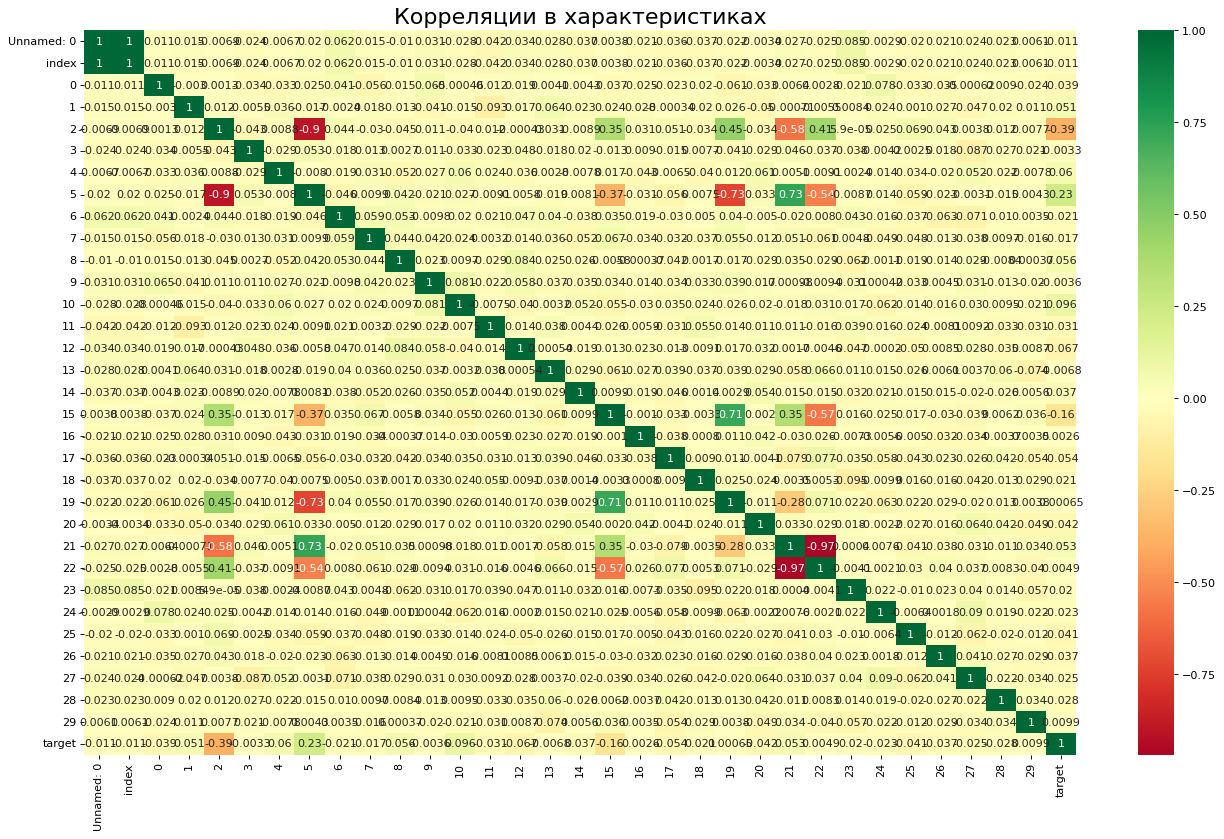

In [12]:
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(df_train.corr(), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [13]:
y = df_train['target']
x = df_train.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
w0 = model.intercept_
w1 = model.coef_
w1 = w1.reshape(-1)
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
print(w0)
mas

[-0.66426805]


[('Unnamed: 0', -0.00012187187686025658),
 ('index', -0.00012187187686025658),
 ('6', -0.003319641893798803),
 ('23', -0.006286908214014312),
 ('0', 0.016109651770248264),
 ('14', 0.02473657447532346),
 ('11', 0.0322895012275185),
 ('24', 0.033392372410049394),
 ('16', 0.040834661216936644),
 ('17', -0.04792234859371707),
 ('7', -0.0632035092688001),
 ('26', -0.06899156098174668),
 ('25', -0.08426578639713678),
 ('9', -0.08513845952091033),
 ('29', 0.08895721735703487),
 ('13', 0.09775683348218929),
 ('3', -0.10156285220558779),
 ('18', -0.10994352883990562),
 ('8', 0.12458016163565892),
 ('1', 0.12505105763660235),
 ('28', -0.13219355666868435),
 ('12', -0.15316416224403936),
 ('27', -0.1668435107409603),
 ('20', -0.18137456911333058),
 ('4', 0.19681923658807282),
 ('21', -0.19975295568444432),
 ('15', -0.20238190152523297),
 ('10', 0.2344960592112449),
 ('5', 0.24151230738802176),
 ('22', 0.3010042672706313),
 ('19', 0.8258386858463053),
 ('2', -1.1575087242893711)]

In [16]:
ans = str(w0)
for i in range(32):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

[-0.66426805] + -0.00012187187686025658 * Unnamed: 0 + -0.00012187187686025658 * index + 0.016109651770248264 * 0 + 0.12505105763660235 * 1 + -1.1575087242893711 * 2 + -0.10156285220558779 * 3 + 0.19681923658807282 * 4 + 0.24151230738802176 * 5 + -0.003319641893798803 * 6 + -0.0632035092688001 * 7 + 0.12458016163565892 * 8 + -0.08513845952091033 * 9 + 0.2344960592112449 * 10 + 0.0322895012275185 * 11 + -0.15316416224403936 * 12 + 0.09775683348218929 * 13 + 0.02473657447532346 * 14 + -0.20238190152523297 * 15 + 0.040834661216936644 * 16 + -0.04792234859371707 * 17 + -0.10994352883990562 * 18 + 0.8258386858463053 * 19 + -0.18137456911333058 * 20 + -0.19975295568444432 * 21 + 0.3010042672706313 * 22 + -0.006286908214014312 * 23 + 0.033392372410049394 * 24 + -0.08426578639713678 * 25 + -0.06899156098174668 * 26 + -0.1668435107409603 * 27 + -0.13219355666868435 * 28 + 0.08895721735703487 * 29


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
answers_pred = model.predict(X_test)
cm = confusion_matrix(y_test, answers_pred)
cm

array([[77, 38],
       [39, 86]])

In [18]:
print('accuracy:', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
recall = cm[0][0]/(cm[0][0]+cm[1][0])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
print('recall:', recall)
print('precision:', precision)
print('f1:', 2 * (precision * recall)/(precision+recall))

accuracy: 0.6791666666666667
recall: 0.6637931034482759
precision: 0.6695652173913044
f1: 0.6666666666666667


In [19]:
print('accuracy:', accuracy_score(y_test, answers_pred))
print('recall:', recall_score(y_test, answers_pred))
print('precision:', precision_score(y_test, answers_pred))
print('f1:', f1_score(y_test, answers_pred))

accuracy: 0.6791666666666667
recall: 0.688
precision: 0.6935483870967742
f1: 0.6907630522088354


Модель обучена, но предсказывает в основном рандомно